## Lab 5 - PID control
Run this cell before running any other cells

In [194]:
%reload_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

ble = get_ble_controller()
ble.connect()

2024-10-20 08:56:42,787 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:ec:f2:c2:23:04
2024-10-20 08:56:45,605 | INFO     |: Connected to c0:ec:f2:c2:23:04


In [195]:
# Notification Handler
def notification_handler(uuid, byte_array):
    global time_list, dist, mpwm
    rx_string = ble.bytearray_to_string(byte_array)
    if rx_string.find(',') < 0:
        print(rx_string[2:])
    else:
        time, ra, pa = rx_string.split(',')
        time_list.append(time[2:])
        dist.append(float(ra[3:]))
        mpwm.append(float(pa[3:]))
        
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [196]:
ble.send_command(CMD.GET_TIME_MILLIS, "")

16579


In [197]:
ble.send_command(CMD.SET_PID_MAX, "0.01|0.0|0.0|50")

In [198]:
ble.send_command(CMD.GO_WALL, "")

In [199]:
# Clear the data
time_list = []
dist = []
mpwm = []

# send the command
ble.send_command(CMD.GET_WALL_DATA, "")

In [ ]:
# rotate CCW
ble.send_command(CMD.SET_PWM, "1|250|250|1|2000")

In [294]:
# rotate CW
ble.send_command(CMD.SET_PWM, "250|1|1|250|2000")

In [278]:
# Forward 2 seconds
ble.send_command(CMD.SET_PWM, "75|0|75|0|2000")

In [293]:
# Backward 2 seconds
ble.send_command(CMD.SET_PWM, "0|75|0|75|2000")

In [295]:
# stop
ble.send_command(CMD.SET_PWM, "0|0|0|0|2000")

In [314]:
# slowest forward
ble.send_command(CMD.SET_PWM, "60|00|60|0|2000")

In [327]:
# slowest turn
ble.send_command(CMD.SET_PWM, "00|180|180|0|5000")

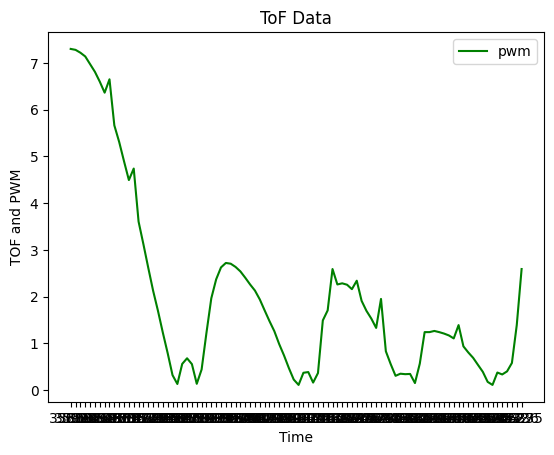

In [202]:
#plt.yticks([-180, -120, -60, 0, 60, 120, 180])
count = len(time_list)
#plt.plot(time_list[:count-1], dist[:count-1], color='r', label='dist')
plt.plot(time_list[:count-1], mpwm[:count-1],  color='g', label='pwm')

#plt.plot(time_list[10:count-1], pitch_al[10:count-1], color='c', label='pitch_al')
#plt.plot(time_list[10:count-1], roll_al[10:count-1],  color='m', label='roll_al')

#plt.plot(time_list[10:count-1], pitch_g[10:count-1], color='r', label='pitch_g')
#plt.plot(time_list[10:count-1], roll_g[10:count-1],  color='g', label='roll_g')
#plt.plot(time_list[10:count-1], yaw_g[10:count-1],   color='b', label='yaw_g')

#plt.plot(time_list[10:count-1], pitch_c[10:count-1], color='c', label='pitch_c')
#plt.plot(time_list[10:count-1], roll_c[10:count-1],  color='m', label='roll_c')
#plt.plot(time_list[10:count-1], yaw_c[10:count-1],   color='y', label='yaw_c')

plt.title('ToF Data')
plt.xlabel('Time')
plt.ylabel('TOF and PWM')
plt.legend()
plt.show()

## Disconnect

In [6]:
# Disconnect
ble.disconnect()

2024-08-02 13:25:58,083 | INFO     |: Disconnected from E8E0F7A4-7773-8749-3CAD-EADBED93F90E
